<a href="https://colab.research.google.com/github/Nobu90/scaling-broccoli/blob/main/%5BE_07%5Dcat_sticker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 루브릭
평가문항 및	상세기준
1. 자기만의 카메라앱 기능 구현을 완수하였다.

얼굴 영역과 랜드마크를 정확하게 검출하고, 스티커 사진을 합성시키는 데 성공하였다.
2. 스티커 이미지를 정확한 원본 위치에 반영하였다.

정확한 좌표계산을 통해 고양이 수염의 위치가 원본 얼굴에 잘 어울리게 출력되었다.
3. 카메라 스티커앱을 다양한 원본이미지에 적용했을 때의 문제점을 체계적으로 분석하였다.

얼굴각도, 이미지 밝기, 촬영거리 등 다양한 변수에 따른 영향도를 보고서에 체계적으로 분석하였다.

# Mount Drive

In [54]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import Libraries

In [55]:
import cv2
import dlib
import os
import matplotlib.pyplot as plt
import numpy as np
import dlib

print(cv2.__version__)
print(dlib.__version__)

4.6.0
19.24.0


# Load Face Image

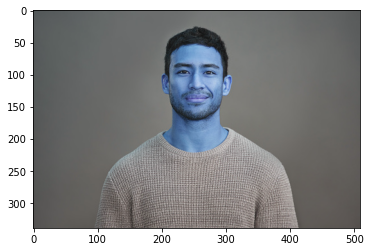

In [56]:
my_image_path = '/content/drive/MyDrive/Exploration/e07/data/frontal_face.jpeg' 
img_bgr = cv2.imread(my_image_path)    
img_show = img_bgr.copy()      
plt.imshow(img_bgr) 
plt.show()

# Change Colors (BGR2RGB)

<function matplotlib.pyplot.show(*args, **kw)>

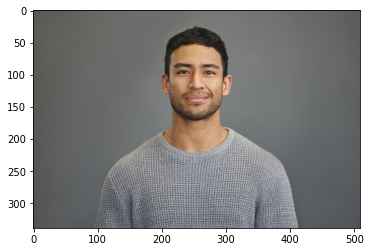

In [57]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show

# Get get_frontal_face_detector

In [58]:
detector_hog = dlib.get_frontal_face_detector()

In [59]:
dlib_rects = detector_hog(img_rgb, 1)   

# Draw Rectanglular On The Face

rectangles[[(199, 68) (306, 175)]]


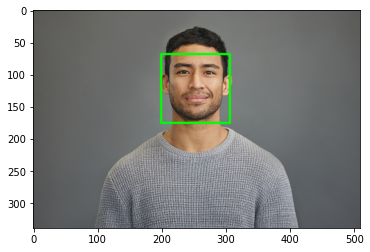

In [60]:
print(dlib_rects)   

for dlib_rect in dlib_rects: 
    l = dlib_rect.left() 
    t = dlib_rect.top() 
    r = dlib_rect.right() 
    b = dlib_rect.bottom() 

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

# Save Landmark

In [61]:
model_path = '/content/drive/MyDrive/Exploration/data/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

In [62]:
list_landmarks = []
   

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
      
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
       
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


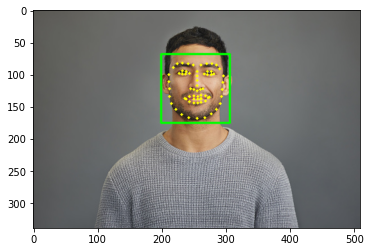

In [63]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [64]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks): 
    x = landmark[30][0] 
    y = landmark[30][1] - dlib_rect.height()//2 
    w = h = dlib_rect.width() 
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')

(x,y) : (255,63)
(w,h) : (108,108)


# Load Sticker Image

In [65]:
sticker_path = '/content/drive/MyDrive/Exploration/e07/data/snapchat-filters-png-4063.png' 
img_sticker = cv2.imread(sticker_path) 
img_sticker = cv2.resize(img_sticker, (w+60, h+60)) #얼굴 사이즈에 맞게 크기 조정
print (img_sticker.shape)

(168, 168, 3)


# Resize Sticker Image

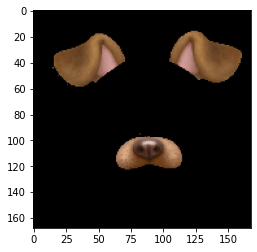

In [66]:
img_sticker_rgb = cv2.cvtColor(img_sticker, cv2.COLOR_BGR2RGB)
plt.imshow(img_sticker_rgb)
plt.show()

# Positioning Sticker

In [67]:
refined_x = x - (w+60) // 2 -5 # 이미지 센터가 안 맞아 살짝 왼쪽으로 -5 추가 조정
refined_y = y - h // 2 

print (f'(x,y) : ({refined_x},{refined_y})') 

(x,y) : (166,9)


In [68]:
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0

if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :] 
    refined_y = 0

print (f'(x,y) : ({refined_x},{refined_y})')

(x,y) : (166,9)


# Apply Sticker

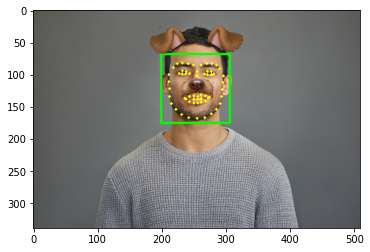

In [69]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)) 
plt.show()

# Result

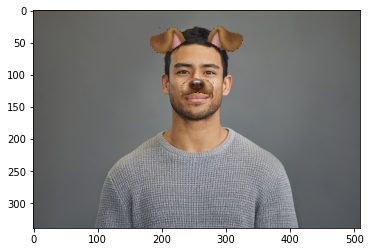

In [70]:
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)) 
plt.show()

# Compare By Angle

In [71]:
my_image_path2 = '/content/drive/MyDrive/Exploration/e07/data/face-reference-angles.jpg' 
img2_bgr = cv2.imread(my_image_path2)    
img2_show = img2_bgr.copy()      

<function matplotlib.pyplot.show(*args, **kw)>

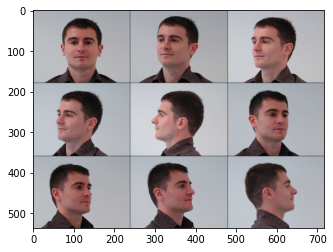

In [72]:
img2_rgb = cv2.cvtColor(img2_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img2_rgb)
plt.show

In [73]:
dlib_rects2 = detector_hog(img2_rgb, 1)  

rectangles[[(554, 226) (643, 315)], [(76, 56) (165, 146)], [(514, 46) (603, 136)], [(285, 46) (374, 136)], [(76, 405) (165, 494)], [(36, 226) (126, 315)], [(270, 229) (345, 304)]]


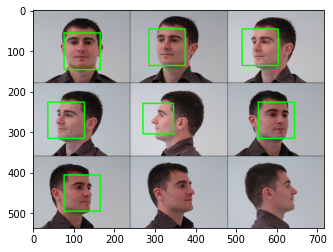

In [74]:
print(dlib_rects2)   

for dlib_rect in dlib_rects2: 
    l = dlib_rect.left() 
    t = dlib_rect.top() 
    r = dlib_rect.right() 
    b = dlib_rect.bottom() 

    cv2.rectangle(img2_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img2_show_rgb =  cv2.cvtColor(img2_show, cv2.COLOR_BGR2RGB)
plt.imshow(img2_show_rgb)
plt.show()

In [75]:
list_landmarks2 = []
   

for dlib_rect in dlib_rects2:
    points = landmark_predictor(img2_rgb, dlib_rect)
      
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
       
    list_landmarks2.append(list_points)

print(len(list_landmarks2[0]))

68


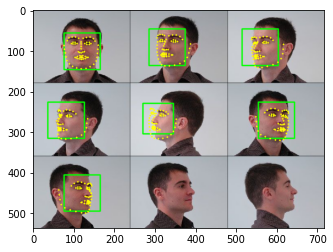

In [76]:
for landmark in list_landmarks2:
    for point in landmark:
        cv2.circle(img2_show, point, 2, (0, 255, 255), -1)

img2_show_rgb = cv2.cvtColor(img2_show, cv2.COLOR_BGR2RGB)
plt.imshow(img2_show_rgb)
plt.show()

## 좌우 각도 테스트
## 눈이 한 쪽만 보이는 경우 얼굴로 인식하지 않음, 특이사항은 왼 눈이 없는 경우에는 어느 정도 예상하여 얼굴로 인식함(가운데 사진이 다소 미스테리함), 오른쪽 눈이라 인식하는지 아니면 빛이 왼쪽에서 와서 인식이 잘 된 부분인지는 확인이 더 필요함

# Compare By Light

In [77]:
my_image_path3 = '/content/drive/MyDrive/Exploration/e07/data/Face Reference Brightness.png' 
img3_bgr = cv2.imread(my_image_path3)    
img3_show = img3_bgr.copy()      

<function matplotlib.pyplot.show(*args, **kw)>

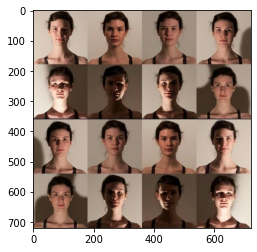

In [78]:
img3_rgb = cv2.cvtColor(img3_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img3_rgb)
plt.show

In [79]:
dlib_rects3 = detector_hog(img3_rgb, 1)  

rectangles[[(411, 403) (486, 478)], [(55, 594) (129, 669)], [(585, 229) (660, 304)], [(594, 47) (668, 121)], [(229, 403) (303, 478)], [(229, 47) (303, 121)], [(55, 412) (129, 486)], [(411, 586) (486, 660)], [(46, 229) (121, 304)], [(411, 38) (486, 113)], [(411, 221) (486, 296)], [(594, 586) (668, 660)], [(239, 225) (301, 288)], [(594, 403) (668, 478)]]


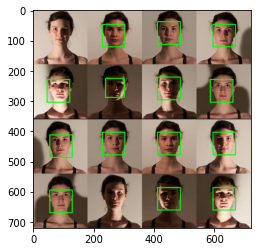

In [80]:
print(dlib_rects3)   

for dlib_rect in dlib_rects3: 
    l = dlib_rect.left() 
    t = dlib_rect.top() 
    r = dlib_rect.right() 
    b = dlib_rect.bottom() 

    cv2.rectangle(img3_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img3_show_rgb =  cv2.cvtColor(img3_show, cv2.COLOR_BGR2RGB)
plt.imshow(img3_show_rgb)
plt.show()

In [81]:
list_landmarks3 = []
   

for dlib_rect in dlib_rects3:
    points = landmark_predictor(img2_rgb, dlib_rect)
      
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
       
    list_landmarks3.append(list_points)

print(len(list_landmarks3[0]))

68


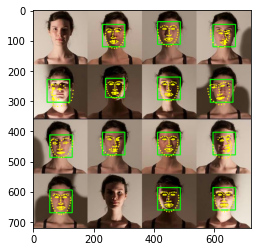

In [82]:
for landmark in list_landmarks3:
    for point in landmark:
        cv2.circle(img3_show, point, 2, (0, 255, 255), -1)

img3_show_rgb = cv2.cvtColor(img3_show, cv2.COLOR_BGR2RGB)
plt.imshow(img3_show_rgb)
plt.show()

## 조명 테스트 결과
## 정면을 바라보는 경우 빛에는 크게 상관없이 높은 인식율을 보임, 단 한 쪽이 완전 어두워 한 눈만 보이는 경우에는 얼굴로 인식하지 않음

# Compare By Distance

In [83]:
my_image_path4 = '/content/drive/MyDrive/Exploration/e07/data/crowd.jpeg' 
img4_bgr = cv2.imread(my_image_path4)    
img4_show = img4_bgr.copy()      

<function matplotlib.pyplot.show(*args, **kw)>

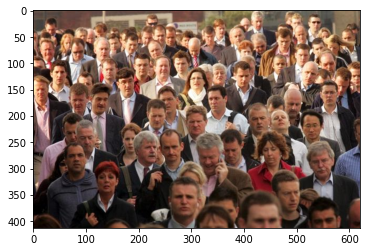

In [84]:
img4_rgb = cv2.cvtColor(img4_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img4_rgb)
plt.show

In [85]:
dlib_rects4 = detector_hog(img4_rgb, 1)  

rectangles[[(199, 68) (306, 175)]]


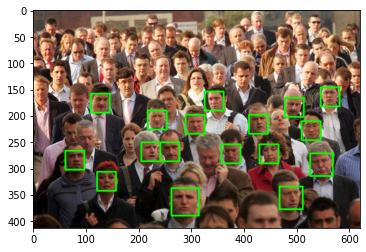

In [86]:
print(dlib_rects)   

for dlib_rect in dlib_rects4: 
    l = dlib_rect.left() 
    t = dlib_rect.top() 
    r = dlib_rect.right() 
    b = dlib_rect.bottom() 

    cv2.rectangle(img4_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img4_show_rgb =  cv2.cvtColor(img4_show, cv2.COLOR_BGR2RGB)
plt.imshow(img4_show_rgb)
plt.show()

In [87]:
list_landmarks4 = []
   

for dlib_rect in dlib_rects4:
    points = landmark_predictor(img4_rgb, dlib_rect)
      
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
       
    list_landmarks4.append(list_points)

print(len(list_landmarks4[0]))

68


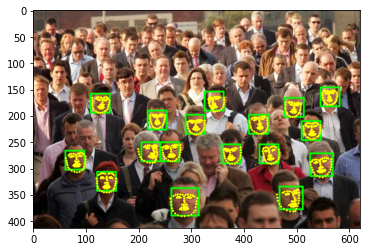

In [88]:
for landmark in list_landmarks4:
    for point in landmark:
        cv2.circle(img4_show, point, 2, (0, 255, 255), -1)

img4_show_rgb = cv2.cvtColor(img4_show, cv2.COLOR_BGR2RGB)
plt.imshow(img4_show_rgb)
plt.show()

## 거리 및 초점 테스트 결과
## 얼굴이 너무 작고 초점이 맞지 않는 경우에는 얼굴로 인식하지 않음, 역시 한 쪽 눈이 가려진 경우에는 얼굴로 인식하지 않음, 고개를 숙이거나 입이 없는 경우에도 얼굴로 인식하지 않았음

# Compare By Angle (include up and down)

In [89]:
my_image_path5 = '/content/drive/MyDrive/Exploration/e07/data/face-by-angles.jpeg' 
img5_bgr = cv2.imread(my_image_path5)    
img5_show = img5_bgr.copy()      

<function matplotlib.pyplot.show(*args, **kw)>

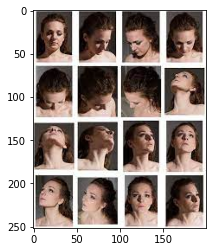

In [90]:
img5_rgb = cv2.cvtColor(img5_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img5_rgb)
plt.show

In [91]:
dlib_rects5 = detector_hog(img5_rgb, 1)  

rectangles[[(5, 14) (41, 50)], [(105, 202) (141, 238)]]


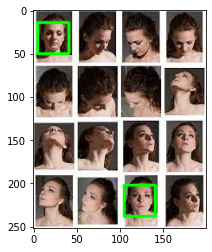

In [92]:
print(dlib_rects5)   

for dlib_rect in dlib_rects5: 
    l = dlib_rect.left() 
    t = dlib_rect.top() 
    r = dlib_rect.right() 
    b = dlib_rect.bottom() 

    cv2.rectangle(img5_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img5_show_rgb =  cv2.cvtColor(img5_show, cv2.COLOR_BGR2RGB)
plt.imshow(img5_show_rgb)
plt.show()

In [93]:
list_landmarks5 = []
   

for dlib_rect in dlib_rects5:
    points = landmark_predictor(img5_rgb, dlib_rect)
      
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
       
    list_landmarks5.append(list_points)

print(len(list_landmarks5[0]))

68


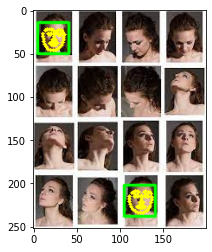

In [94]:
for landmark in list_landmarks5:
    for point in landmark:
        cv2.circle(img5_show, point, 2, (0, 255, 255), -1)

img5_show_rgb = cv2.cvtColor(img5_show, cv2.COLOR_BGR2RGB)
plt.imshow(img5_show_rgb)
plt.show()

## 상하 좌우 각도 테스트 결과
## 좌우 각도의 변화에 비해 위 아래 각도가 변할 경우에는 인식률이 급격하게 떨어진다.

# Conclusion

## 최종 테스트 결과

 1. 한 쪽 눈이 없거나, 입이 없는 경우에는 얼굴로 인식하지 않는다.
 2. 조명에는 크게 영향을 받지 않는다.(1번에 해당할 때 까지)
 3. 좌우 각도에는 크게 영향을 받지 않으나, 위 아래의 각도에는 크게 영향을 받는다. 이 역시 1번에 해당 하기에 상하 각도가 더 영향을 미치기 때문으로 보인다.
 4. 거리가 먼 경우에도 얼굴이 작아서 눈, 코, 입 구분이 어려운지 인식이 되지 않았다,

# Problem

## 스티커 적용 시 추가 문제점
 1. 스티커가 평면이기 때문에 각도에 따라서 이상한 그림이 연출된다. (옆 모습인데 스티커는 앞을 바라보고 있는..아래를 보고 있는데 스티커는 계속 앞을 바라고 있는..)
 2. 스티커에는 조명의 영향을 미치지 않기 때문에 다소 어색하다. (사람은 어두우나 스티커만 홀로 선명하다.)
 3. 사람마다 얼굴 너비 및 길이 등 비율이 다른 경우가 많아 예를 들어 귀가 있는 스티커의 경우 한 명에게 맞출 경우 어떤 사람은 눈썹에, 어떤 사람은 머리 위에 귀가 생긴다던가 하는 문제가 있다.
 4. 스티커가 코 기준으로 좌우 너비가 대칭이지 않을 경우 귀 사이가 대칭이 안 맞거나 귀를 맞추면 코가 안 맞는 경우가 생긴다.



# Solution

## 해결 방법
 1. 보통 뒤통수나 옆 모습에 스티커를 붙이려는 목적은 없으므로, 눈 위치를 통해 일정 각도가 돌아가면 스티커를 미적용하거나, 아니면 옆 모습 전용 스티커를 추가로 대기시켰다가 적용시킨다. (뒤 통수는 어차피 본인이 못 보니까 상관 없다..)
 2. 이미지의 전체 명도를 체크해 스티커 앞에 명도에 따른 필터를 적용한다.(근데 다시 생각해보니 스티커가 굳이 조명에 따라 바뀌지 않는게 크게 문제가 아닐 수도 있을 것 같다.)
 3. (얼굴이 일부만 가려지는 경우) 스티커의 양 눈과 양 귀를 한 쪽씩 그리고 입을 모두 분리한 후 위치를 각각 적용 시킨다(얼굴 너비도 다르므로 눈과 귀도 하나씩 분리가 필요함)
 4. (얼굴 전체가 가려지는 경우) 전체 얼굴 윤곽 및 코 기준으로 크기를 정해서 덮어버린다.(단, 코 기준으로 스티커 좌우 크기가 동일해야 한다)